In [114]:
import numpy as np
from random import random,seed
from itertools import product, accumulate
from icecream import ic 
from matplotlib import pyplot as plt


In [115]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def fitness(solution : np.ndarray):
    return (valid(solution), -cost(solution))


# First Instance with Random Mutation Hill Climber
Implements random restart if the value remains stagnant for a certain number of steps

In [129]:
UNIVERSE_SIZE = 100
NUM_SETS = 10
DENSITY = 0.2
MAX_STEPS = 1000
RESTART_THRESHOLD = 100
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution), fitness(solution)


(np.True_,
 np.float64(268.94579779603094),
 (np.True_, np.float64(-268.94579779603094)))

ic| fitness(solution): (np.True_, np.float64(-268.94579779603094))
ic| 'Steps to max:', stepsToMax: 0
ic| fitness(solution): (np.True_, np.float64(-268.94579779603094))


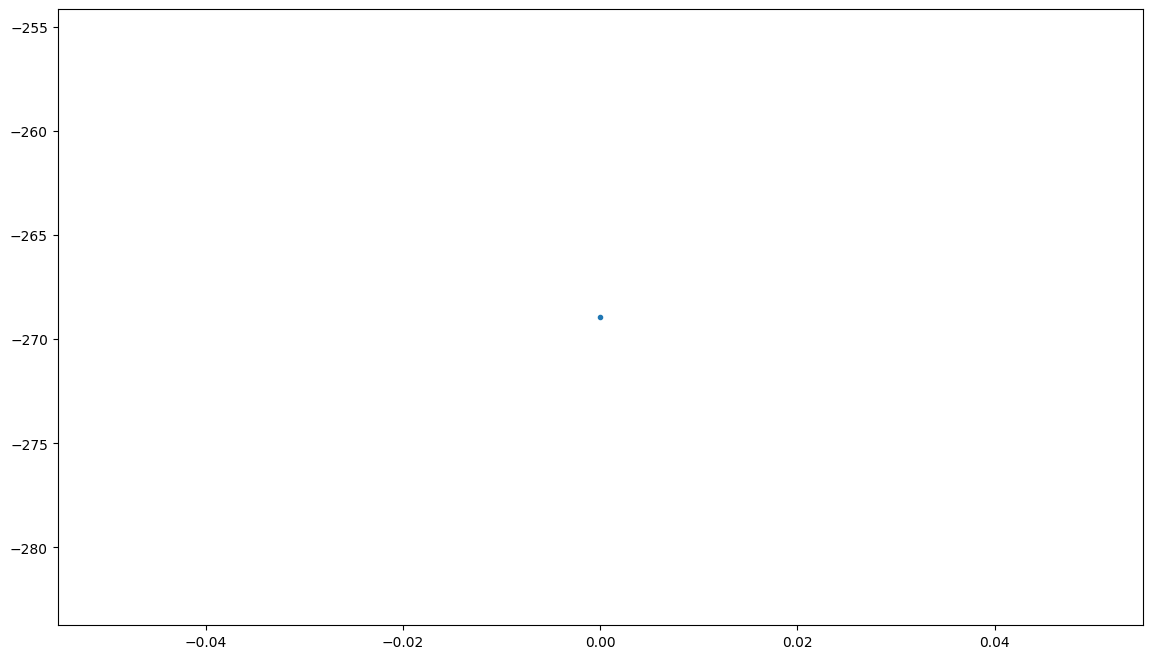

In [132]:
solution = rng.random(NUM_SETS) < .5
while not valid(solution):
    solution = rng.random(NUM_SETS) < .5

current_cost = cost(solution)
history = [fitness(solution)[1]]
ic ( fitness(solution))

stepsToMax = 0
stagnant_steps = 0

for steps in range(MAX_STEPS):
    new_solution = solution.copy()
    i = rng.integers(NUM_SETS)
    new_solution[i] = not new_solution[i]
    
    if valid(new_solution):
        history.append(fitness(new_solution)[1])
        if fitness(new_solution) > fitness(solution):
            if cost(new_solution) != cost(solution):
                stepsToMax = steps
            solution = new_solution
            stagnant_steps = 0
        else:
            stagnant_steps += 1
        
    if stagnant_steps > RESTART_THRESHOLD:
        solution = rng.random(NUM_SETS) < .5
        while not valid(solution):
            solution = rng.random(NUM_SETS) < .5
        stagnant_steps = 0
        current_cost = cost(solution)
    
    #ic(steps, current_cost)


ic ("Steps to max:", stepsToMax)
ic (fitness(solution))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

            

# Second Instance with Random Mutation Hill Climber

In [151]:
UNIVERSE_SIZE = 1000
NUM_SETS = 100
DENSITY = 0.2
MAX_STEPS = 3000
RESTART_THRESHOLD = 1000
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution), fitness(solution)

(np.True_,
 np.float64(33962.206874760544),
 (np.True_, np.float64(-33962.206874760544)))

ic| fitness(solution): (np.True_, np.float64(-18519.49482609255))


ic| 'Steps to max:', stepsToMax: 4780
ic| fitness(solution): (np.True_, np.float64(-7381.758511082448))


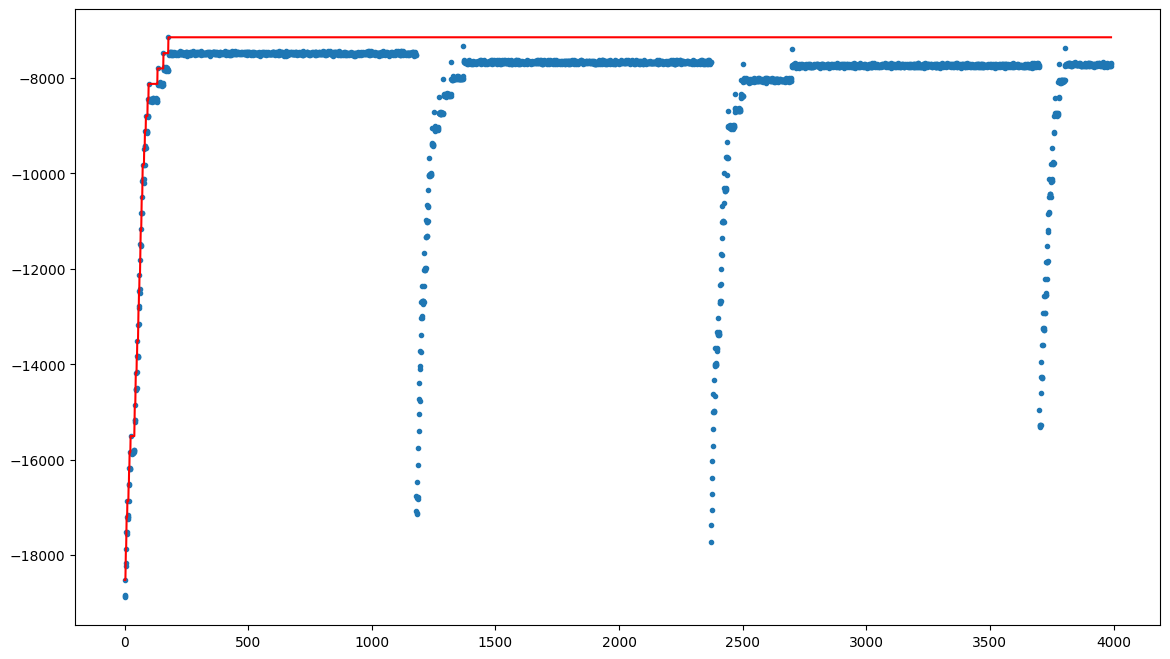

In [150]:
solution = rng.random(NUM_SETS) < .5
while not valid(solution):
    solution = rng.random(NUM_SETS) < .5

current_cost = cost(solution)
history = [fitness(solution)[1]]
ic (fitness(solution))

stepsToMax = 0
stagnant_steps = 0

for steps in range(MAX_STEPS):
    new_solution = solution.copy()
    i = rng.integers(NUM_SETS)
    new_solution[i] = not new_solution[i]
    
    if valid(new_solution):
        history.append(fitness(new_solution)[1])
        if fitness(new_solution) > fitness(solution):
            if cost(new_solution) != cost(solution):
                stepsToMax = steps
            solution = new_solution
            stagnant_steps = 0
        else:
            stagnant_steps += 1
        
    if stagnant_steps > RESTART_THRESHOLD:
        solution = rng.random(NUM_SETS) < .5
        while not valid(solution):
            solution = rng.random(NUM_SETS) < .5
        stagnant_steps = 0
        current_cost = cost(solution)
    
    #ic(steps, cost(solution))

ic ("Steps to max:", stepsToMax)
ic (fitness(solution))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

